# Importing the required Libraries

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [281]:
df= pd.read_csv('Titanic.csv')


In [282]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration

In [283]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [284]:
 df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [285]:
df.shape

(891, 12)

In [286]:
numerical_cols = ['Age', 'Fare']

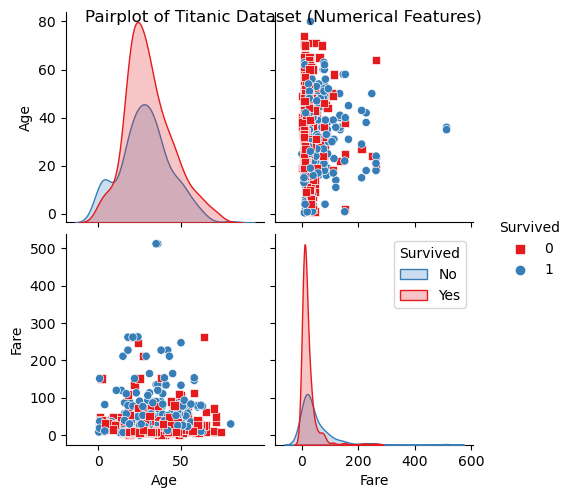

In [287]:
#  plotting Pairplotof Numerical features['Age','Fare']
sns.pairplot(df, vars=numerical_cols, hue='Survived', diag_kind='kde', markers=['s', 'o'], palette='Set1')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.suptitle('Pairplot of Titanic Dataset (Numerical Features)')
plt.show()

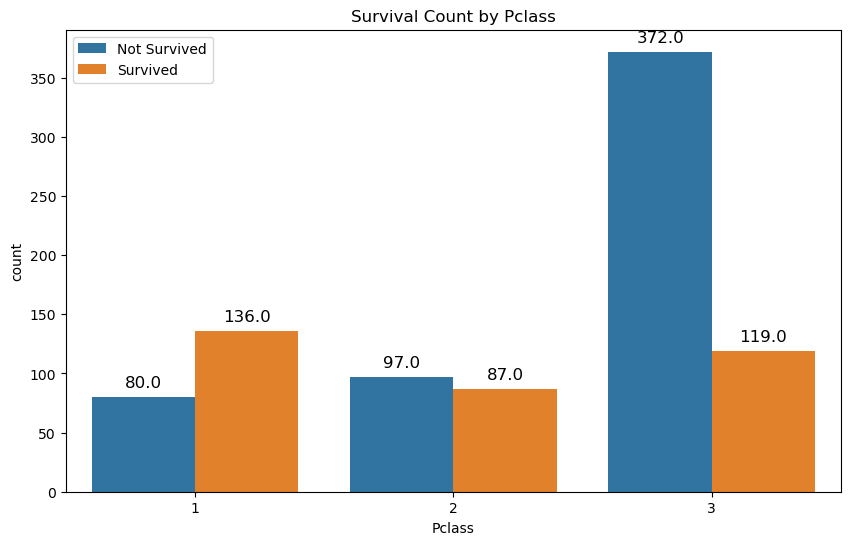

In [288]:
# Pclass Distribution by Surival
plt.figure(figsize =(10,6))
g = sns.countplot(data=df, x='Pclass', hue='Survived')

# Adding counts on top of each bar
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.legend(["Not Survived", "Survived"])
plt.title("Survival Count by Pclass")
plt.show()

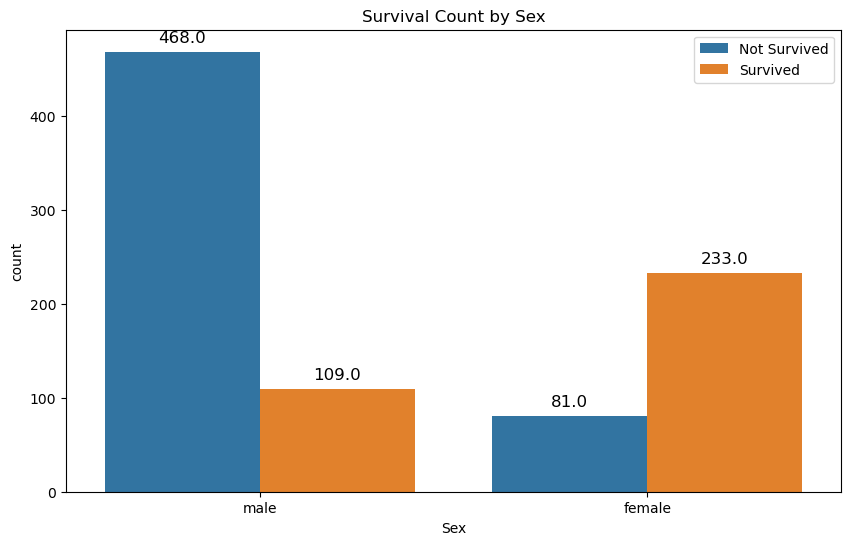

In [289]:
# Sex Distribution by Surival
plt.figure(figsize =(10,6))
g = sns.countplot(data=df, x='Sex', hue='Survived')

# Adding counts on top of each bar
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.legend(["Not Survived", "Survived"])
plt.title("Survival Count by Sex")
plt.show()

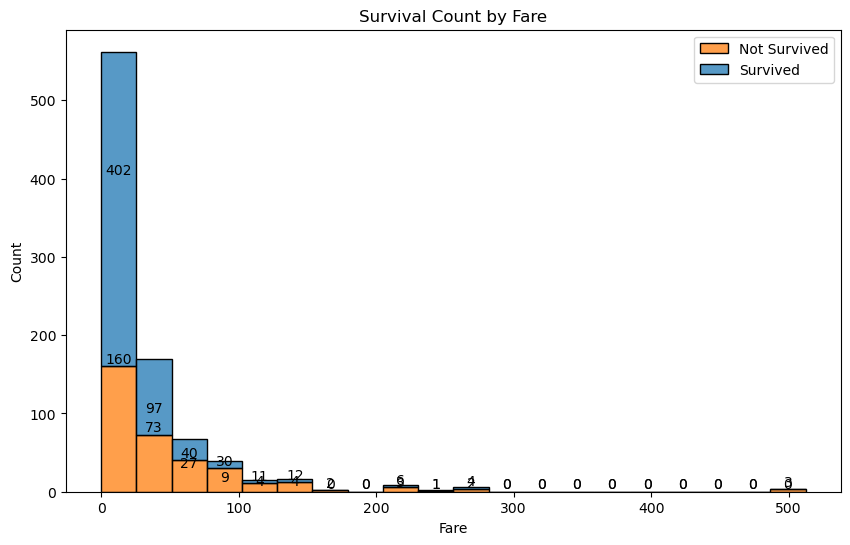

In [290]:
# Fare Distribution by Surival
plt.figure(figsize=(10, 6))
g = sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=20)

# Adding counts on top of each bar
for p in g.patches:
    g.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.legend(["Not Survived", "Survived"])
plt.title("Survival Count by Fare")
plt.show()

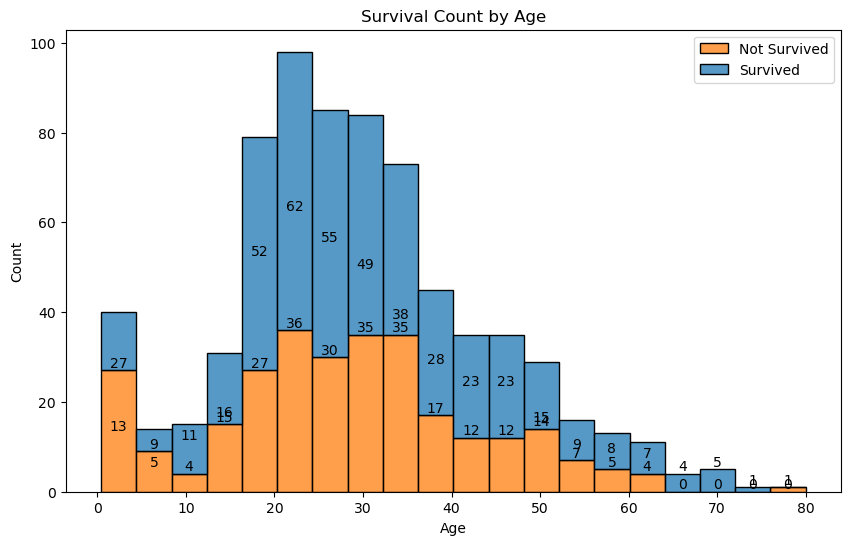

In [291]:


plt.figure(figsize=(10, 6))
g = sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)

# Adding counts on top of each bar
for p in g.patches:
    g.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.legend(["Not Survived", "Survived"])
plt.title("Survival Count by Age")
plt.show()


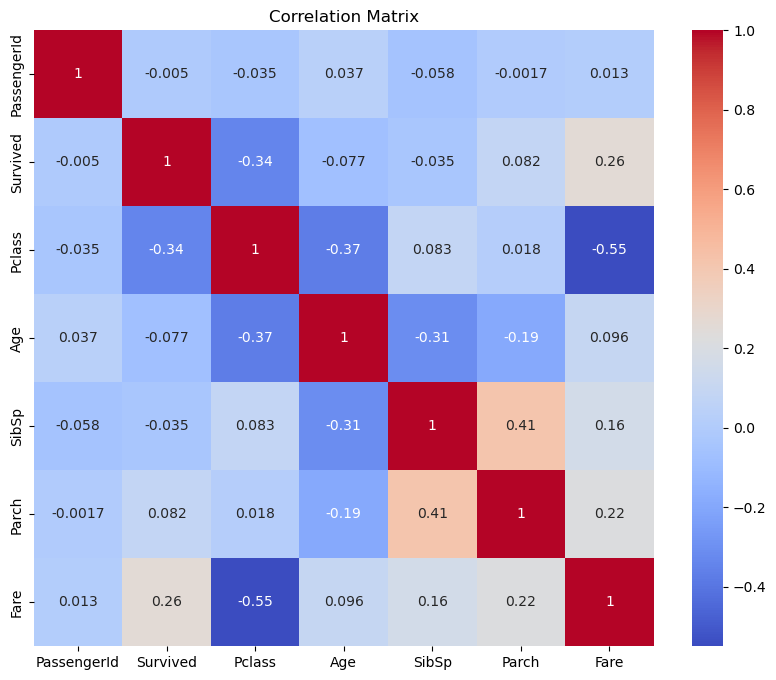

In [292]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

In [293]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [294]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
df.drop(['Name', 'Cabin','Embarked', 'Ticket'], axis=1, inplace=True)

In [296]:
# Checking the miss values in the columns
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [297]:
# Fixing the missing values in the column Age 
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [298]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [299]:
# Checking for duplicated rows in the DataFrame
duplicates = df[df.duplicated()]

# Print the duplicated rows, if any
if not duplicates.empty:
    print("Duplicated Rows:")
    print(duplicates)
else:
    print("No duplicated rows found.")

No duplicated rows found.


Since, there is no Duplicateed Rows found in the dataframe. So We can carry out the Splitting data into test and train.

In [300]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

## Splitting Data into features(X) and target(Y)

In [301]:
X= df.drop(['Survived'], axis=1)
y= df['Survived']

In [302]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state= 42)

In [303]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## # Initializing the classifier and Training the model on the training data

In [304]:
# Initializing the classifier
clf = RandomForestClassifier(n_estimators = 100, random_state=42)

# Training the model on the training data
clf.fit(x_train_scaled, y_train)
  

RandomForestClassifier(random_state=42)

In [305]:
y_pred = clf.predict(x_test_scaled)



In [306]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


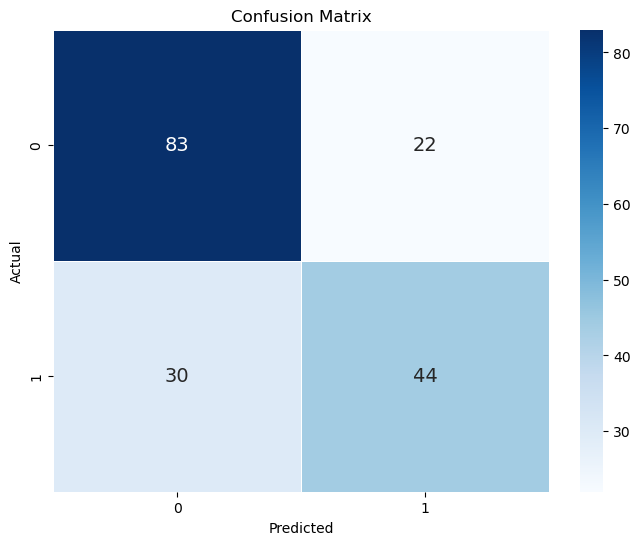

In [307]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
